In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [71]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# from sklearn.cross_validation import train_test_split
import numpy as np

In [72]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [73]:
seds = pd.read_csv('.../Dropbox (LIINC)/DataThon2019/Datasets/seds.csv')

In [74]:
seds.head(5)

,year,msn,state_name,state_code,description,energy_bin,value,unit
0,1960,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
1,1961,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
2,1962,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
3,1963,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu
4,1964,ABICB,Alaska,AK,Aviation gasoline blending components consumed...,Petroleum,0.0,Billion Btu


In [191]:
top10_states = ['Texas', 'Indiana', 'Ohio', 'Illinois', 'Kentucky', 'West Virginia',
       'Pennsylvania', 'North Carolina', 'Florida', 'Missouri']

In [31]:
state = 'Pennsylvania'

In [85]:
coal_price_all = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('D')]

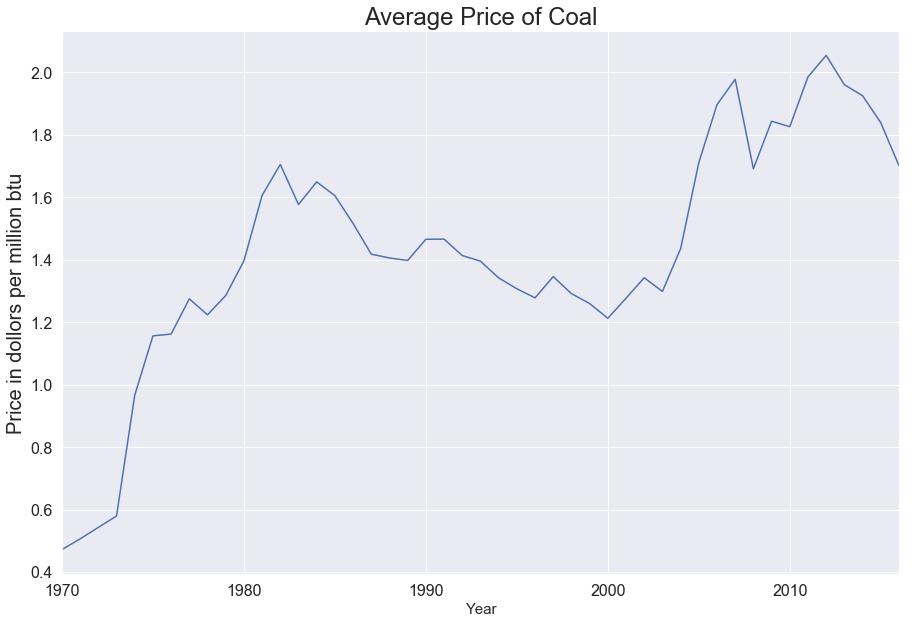

In [106]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
year = np.array(coal_price_all.groupby('year').mean()[:-1].index)
plt.plot(year,coal_price_all.groupby('year').mean()[:-1]['value'].values)
plt.ylabel("Price in dollors per million btu",fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.title('Average Price of Coal',fontsize=24)
plt.xlim(1970, 2016)
plt.show()

In [103]:
year

Int64Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
            1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2015, 2016],
           dtype='int64', name=u'year')

In [33]:
coal_price = coal_price_all[coal_price_all['state_name']==state].groupby('year').mean()[:-1]['value'].values

# consumption of different energy sources
solar_consumption = seds[seds["msn"].str.startswith("SO") & seds["msn"].str.endswith('B')]
wind_consumption = seds[seds["msn"].str.startswith("WY") & seds["msn"].str.endswith('B')]
hydro_consumption = seds[seds["msn"].str.startswith("HY") & seds["msn"].str.endswith('B')]
geo_consumption = seds[seds["msn"].str.startswith("GE") & seds["msn"].str.endswith('B')]
biomass_consumption = seds[seds["msn"].str.startswith("WW") & seds["msn"].str.endswith('B')]
nuclear_consumption = seds[seds["msn"].str.startswith("NU") & seds["msn"].str.endswith('B')]
coal_consumption = seds[seds["msn"].str.startswith("CL") & seds["msn"].str.endswith('B')]
total_consumption = seds[seds["msn"].str.startswith("TE") & seds["msn"].str.endswith('B')]

# percentage of comsumption relative to total consumption
total = total_consumption[total_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values
solar = solar_consumption[solar_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
wind = wind_consumption[wind_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
hydro = hydro_consumption[hydro_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
geo = geo_consumption[geo_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
biomass = biomass_consumption[biomass_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
nuclear = nuclear_consumption[nuclear_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total
coal = coal_consumption[coal_consumption['state_name']==state].groupby('year').sum()[:-1]['value'].values/total

year = np.array(total_consumption[total_consumption['state_name']=='Texas'].groupby('year').sum()[:-1].index)

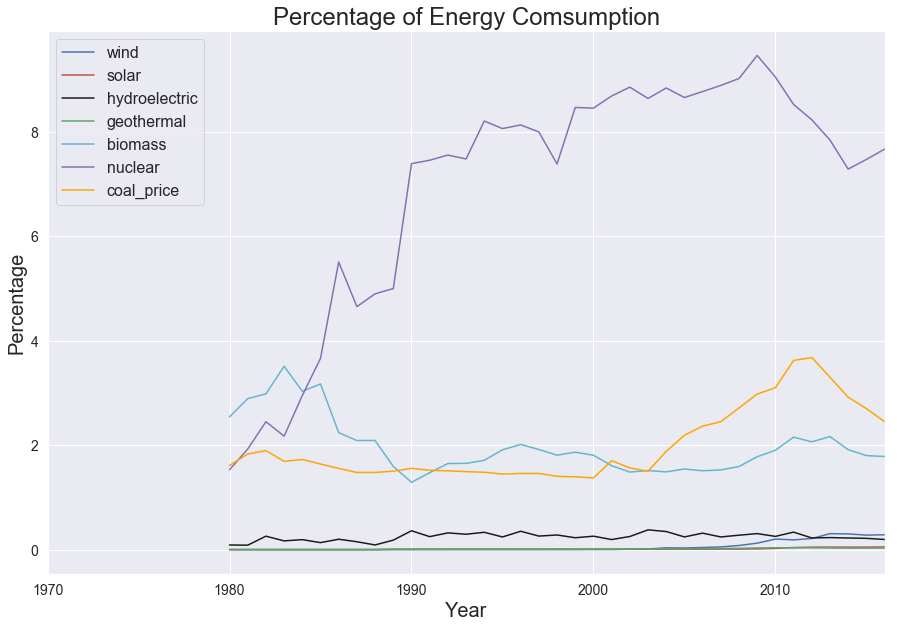

In [59]:
offset_1 = 20
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(year[offset_1:],wind[offset_1:]*100,label="wind")
plt.plot(year[offset_1:],solar[offset_1:]*100,'r',label="solar")
plt.plot(year[offset_1:],hydro[offset_1:]*100,'k',label="hydroelectric")
plt.plot(year[offset_1:],geo[offset_1:]*100,'g',label="geothermal")
plt.plot(year[offset_1:],biomass[offset_1:]*100,'c',label="biomass")
plt.plot(year[offset_1:],nuclear[offset_1:]*100,'m',label="nuclear")
# plt.plot(year,coal*100,'orange',label="coal")
plt.plot(year[offset_1:],coal_price[offset_1-10:],'orange',label="coal_price")


plt.legend(fontsize=16)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Percentage of Energy Comsumption',fontsize=24)
plt.xlim(1970, 2016)
plt.show()

In [61]:
columns = ['year','coal_price','solar','wind','geo','hydro','biomass','nuclear','coal']
df = pd.DataFrame(columns=columns)
df['year'] = year[offset_1:]
df['coal_price'] = coal_price[offset_1-10:]
df['solar'] = solar[offset_1:]*100
df['wind'] = wind[offset_1:]*100
df['geo'] = geo[offset_1:]*100
df['hydro'] = hydro[offset_1:]*100
df['biomass'] = biomass[offset_1:]*100
df['nuclear'] = nuclear[offset_1:]*100
df['coal'] = coal[offset_1:]*100

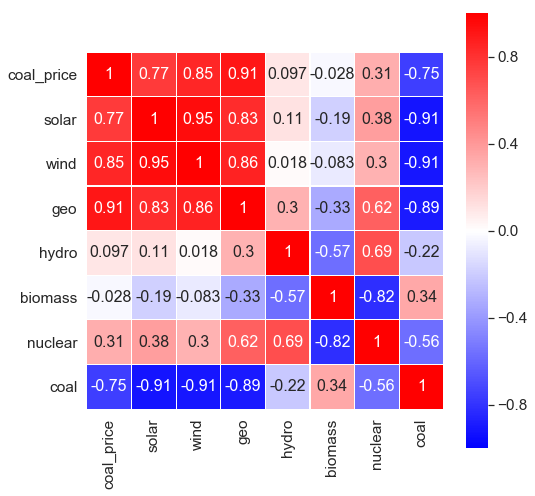

In [62]:
sns.set(font_scale=1.4)
corr = df.drop('year', axis=1).corr() # Exclude the response variable
plt.figure(figsize=(8, 8))
sns.heatmap(corr, 
            cmap='bwr', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 16}, square=True);

In [63]:
lm1 = smf.ols(formula='coal_price ~ wind + solar + nuclear + hydro + geo + biomass + nuclear + coal', data=df).fit()

# print the coefficients
lm1.params

Intercept     0.185092
wind         -0.247617
solar         6.250676
nuclear      -0.089813
hydro         0.032415
geo          78.251001
biomass       0.100341
coal          0.030406
dtype: float64

In [38]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             coal_price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.01e-16
Time:                        12:26:41   Log-Likelihood:               -0.85937
No. Observations:                  47   AIC:                             17.72
Df Residuals:                      39   BIC:                             32.52
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4754      1.095     -0.434      0.666      -2.689       1.738
wind           1.1660      2.467      0.473      0.639      -3.824       6.156
solar         -1.0823     10.845     -0.100      0.921     -23.019      20.854
nuclear        0.0448      0.046      0.968      0.339      -0.049       0.138
hydro         -0.6922      0.819     -0.845      0.403      -2.350       0.965
geo           57.6019     11.749      4.903      0.000      33.838      81.366
biomass        0.4554      0.087      5.217      0.000       0.279       0.632
coal           0.0170      0.018      0.958      0.344      -0.019       0.053
==============================================================================
Omnibus:                        3.908   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.037
Skew:                          -0.223   Prob(JB):                        0.361
Kurtosis:                       2.083   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
X = df[['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear','coal']]
y = df['coal_price']
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)


0.185092016206579
[ 6.25067629e+00 -2.47616952e-01 -4.49065850e-02  3.24154733e-02
  7.82510013e+01  1.00340955e-01 -4.49065850e-02  3.04064703e-02]


In [65]:
def pretty_print_linear(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)


In [66]:
from sklearn.linear_model import Lasso
lm2 = LinearRegression()
X = df[['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']]
y = df['coal_price']
names = ['solar','wind','nuclear', 'hydro','geo', 'biomass','nuclear']
lasso = Lasso(alpha=.1)
lasso.fit(X, y)
  
print(pretty_print_linear(lasso.coef_, names, sort = True))

# rfecv = RFECV(estimator = lm2, step = 2, cv=StratifiedKFold(2))
# rfecv.fit(X, y)

# print('The optimal number of features is {}'.format(rfecv.n_features_))
# features = [f for f,s in zip(uber_df_selected_copy, rfecv.support_) if s]
# print('The selected features are:')
# print ('{}'.format(features))

0.073 * nuclear + 0.0 * nuclear + 0.0 * solar + 0.0 * wind + -0.0 * hydro + 0.0 * geo + 0.0 * biomass


In [249]:
lasso.coef_.s

array([-0.00000000e+00,  8.65103700e-01, -1.15029614e-01, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.95010414e-16,  5.07809244e-02])

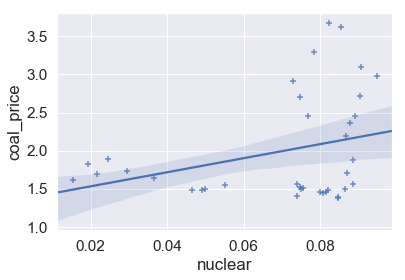

In [68]:
ax = sns.regplot(x=np.arcsin(df['nuclear']/100), y=df['coal_price'], marker="+")

In [69]:
ax = sns.regplot(x=(df['nucclear']), y=df['coal_price'], marker="+")

KeyError: 'nucclear'

In [53]:
np.arcsin(df['nuclear']/100)

0     0.000610
1     0.000589
2     0.000367
3     0.000455
4     0.009217
5     0.021115
6     0.020715
7     0.022016
8     0.027878
9     0.022540
10    0.015288
11    0.019250
12    0.024488
13    0.021717
14    0.029507
15    0.036627
16    0.055091
17    0.046533
18    0.048992
19    0.049997
20    0.073956
21    0.074614
22    0.075605
23    0.074856
24    0.082143
25    0.080689
26    0.081394
27    0.080044
28    0.073897
29    0.084746
30    0.084625
31    0.086951
32    0.088653
33    0.086484
34    0.088491
35    0.086663
36    0.087803
37    0.088984
38    0.090311
39    0.094755
40    0.090600
41    0.085322
42    0.082389
43    0.078487
44    0.072915
45    0.074760
46    0.076741
Name: nuclear, dtype: float64